In [1]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [8]:
df.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [9]:
dups=df.duplicated()
dups.sum()

0

In [10]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [12]:
# From the above exploration the provided Data is clean and from the describe of data there is no bif difference in variance 
# we can check for the outliers and distrubition of data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

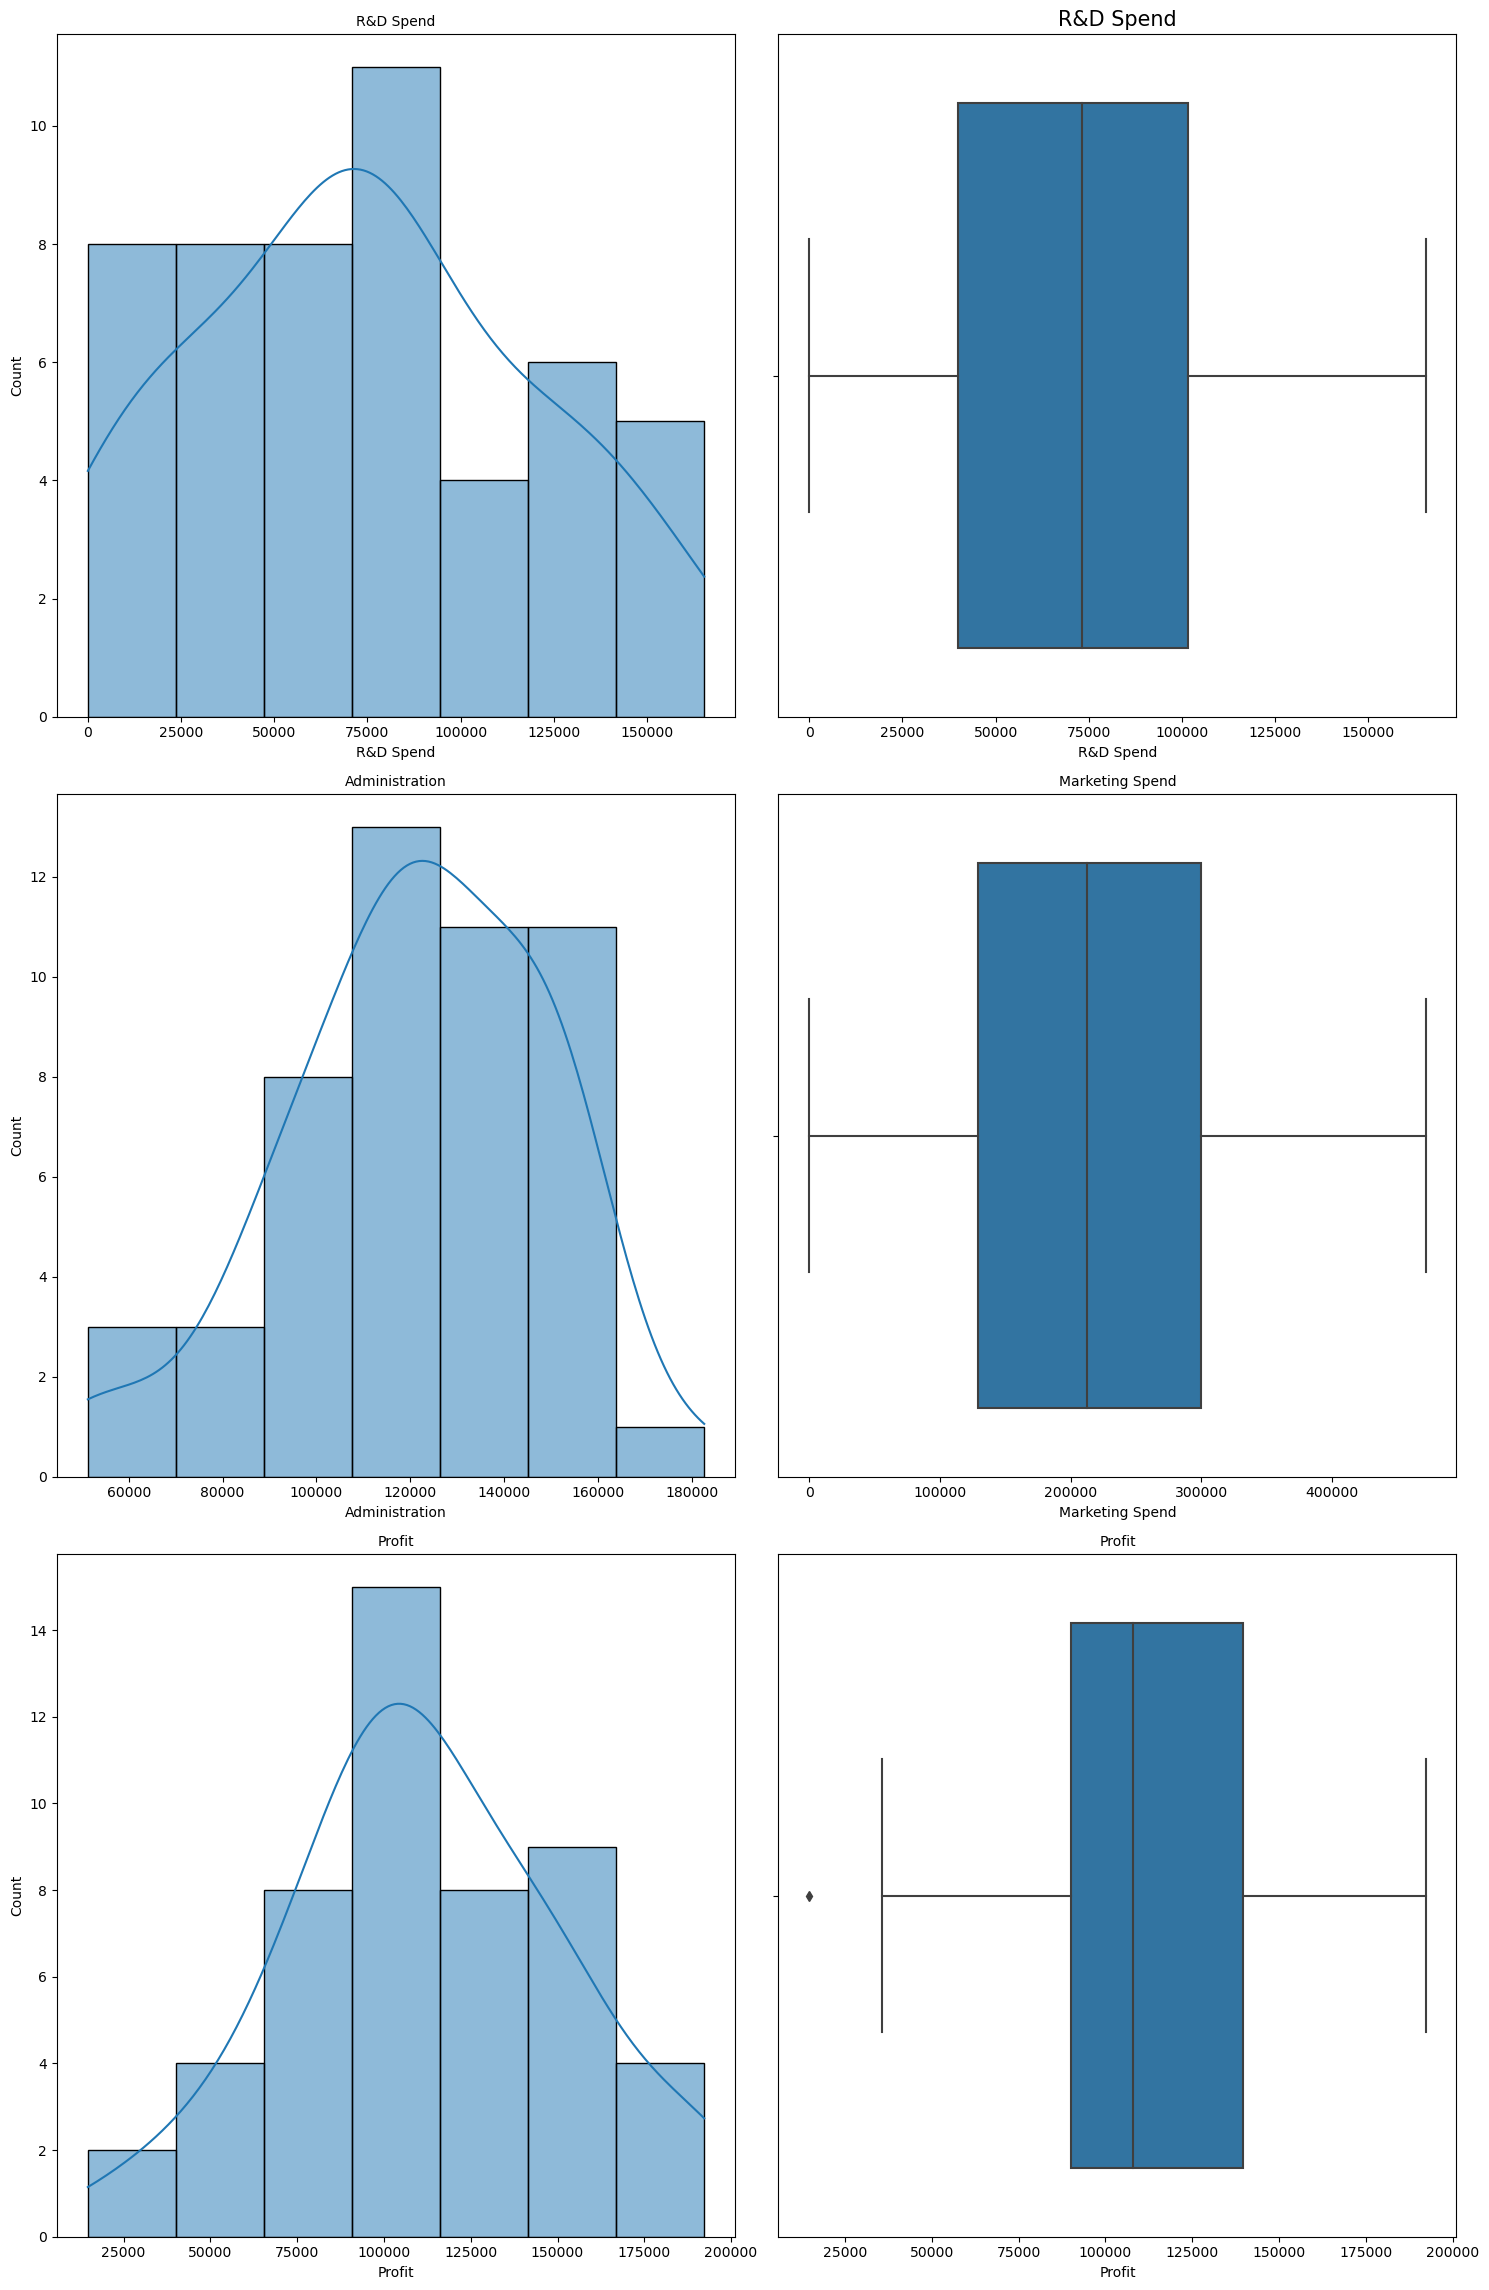

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 23)

sns.histplot(df['R&D Spend'], kde=True, ax=axes[0][0])
axes[0][0].set_title("R&D Spend", fontsize=10)

sns.boxplot(x=df['R&D Spend'], ax=axes[0][1])
axes[0][1].set_title("R&D Spend", fontsize=15)

sns.histplot(df['Administration'], kde=True, ax=axes[1][0])
axes[1][0].set_title("Administration", fontsize=10)

sns.boxplot(x=df['Marketing Spend'], ax=axes[1][1])
axes[1][1].set_title("Marketing Spend", fontsize=10)

sns.histplot(df['Profit'], kde=True, ax=axes[2][0])
axes[2][0].set_title("Profit", fontsize=10)

sns.boxplot(x=df['Profit'], ax=axes[2][1])
axes[2][1].set_title("Profit", fontsize=10)

plt.tight_layout()


plt.show()


In [13]:
#from the visualizaation of data there is no outliers in the data and we can clearly observe the distribution of the data

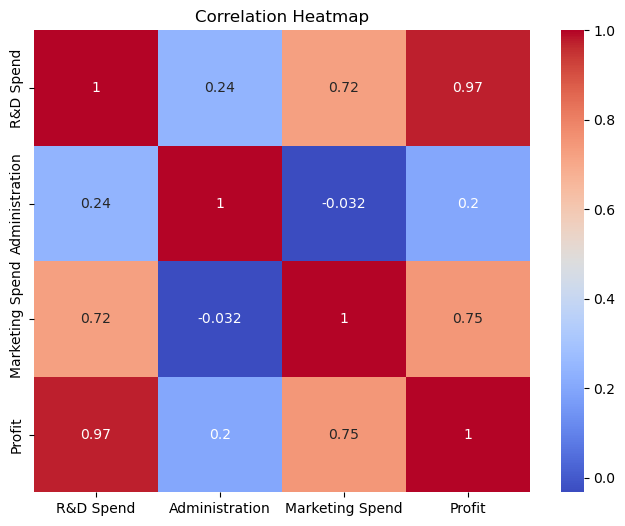

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#from the correlation we clearly notice the correlating factor for our target variable(profit) is" R&D Spend and marketing Spend"

Text(0, 0.5, 'profit')

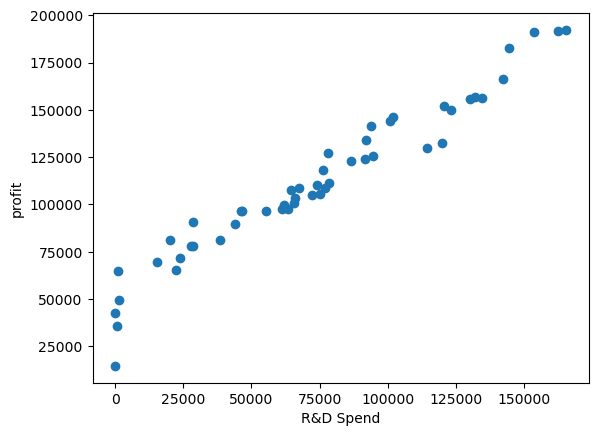

In [14]:
plt.scatter(df["R&D Spend"],df.Profit)
plt.xlabel("R&D Spend")
plt.ylabel("profit")

Text(0, 0.5, 'profit')

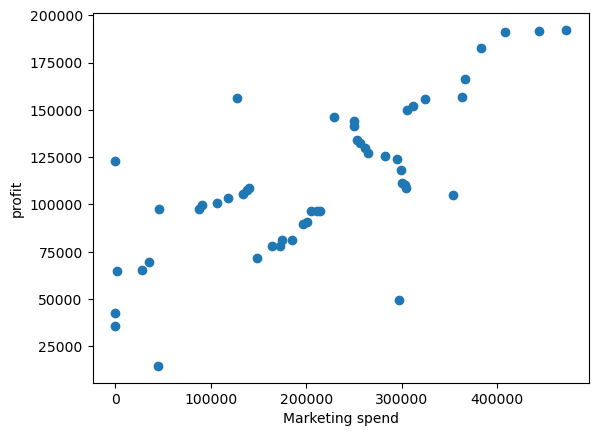

In [15]:
plt.scatter(df['Marketing Spend'],df.Profit)
plt.xlabel("Marketing spend")
plt.ylabel("profit")

In [29]:
# from the above scattter plots we clearly observe that R&D spends gives linear trends to the profit and somewhat to Marketing spend

In [30]:
# we clearly conclude from the observation that spend on R&D shows clear growing trends Linearly to the profit in such way ML algorithms can be Regression is the good choice

In [33]:
# We can check wheather removing the Admininstration columns and check the corealtion .

In [29]:
df1 = df.drop('Administration', axis='columns')
df1.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


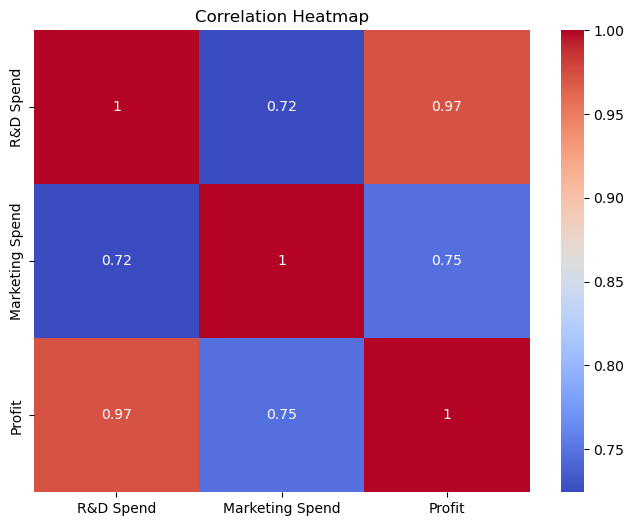

In [17]:
correlation_matrix = df1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
#removing column of Admistration may skew the prediction of model which makes model imbalance.

In [54]:
#making the multiple regression models

In [30]:
x = df.drop(['Profit', 'Administration'], axis=1)
y = df['Profit']

In [20]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.head()

,R&D Spend,Marketing Spend
33,55493.95,214634.81
35,46014.02,205517.64
26,75328.87,134050.07
34,46426.07,210797.67
18,91749.16,294919.57


In [76]:
# trying Multiple Linear regression on the dataframe

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
y=model.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
lmse = mean_squared_error(y_test, y)
lmae = mean_absolute_error(y_test, y)
lr2 = r2_score(y_test, y)

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
model1=DecisionTreeRegressor()

In [45]:
model1.fit(x_train,y_train)

67220275.37568131

In [41]:
y1 = model1.predict(x_test)

In [52]:
drmse = mean_squared_error(y1, y_test)
drmae = mean_absolute_error(y1, y_test)
drr2 = r2_score(y1, y_test)

In [54]:
mod2=RandomForestRegressor()

In [55]:
mod2.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
y2=mod2.predict(x_test)

In [59]:
rrmse = mean_squared_error(y2, y_test)
rrmae = mean_absolute_error(y2, y_test)
rrr2 = r2_score(y2, y_test)

In [63]:
print("the MSE of Linear regression",lmse)
print("the mae of Linear regression",lmae)
print("the r2 score of Linear regression",lr2)


the MSE of Linear regression 67220275.37568131
the mae of Linear regression 6886.5945882465185
the r2 score of Linear regression 0.9474386447268488


In [64]:
print("the MSE of decisiontree reg",drmse)
print("the mae of decisiontree",drmae)
print("the r2 score of decisiontree",drr2)


the MSE of decisiontree reg 49607308.50916002
the mae of decisiontree 5232.012000000004
the r2 score of decisiontree 0.9643864608684225


In [66]:
print("the MSE of Randomforest reg",rrmse)
print("the mae of Randomforest reg",rrmae)
print("the r2 score ofRandomforest reg",rrr2)


the MSE of Randomforest reg 43872394.84482297
the mae of Randomforest reg 5371.293830000022
the r2 score ofRandomforest reg 0.961918793953732


In [72]:
linear={"MSE":lmse,"MAE":lmae,"r2":lr2}
decision={"MSE":drmse,"MAE":drmae,"r2":drr2}
Random={"MSE":rrmse,"MAE":rrmae,"r2":rrr2}

In [73]:
weights = {'MSE': 0.4, 'MAE': 0.4, 'R-squared': 0.2}

In [79]:
def calculate_overall_score(metrics_dict, weights):
    overall_scores = {}
    for model_name, metrics in metrics_dict.items():
        overall_score = (
            weights['MSE'] * metrics['MSE'] +
            weights['MAE'] * metrics['MAE'] +
            weights['R-squared'] * metrics['R-squared']
        )
        overall_scores[model_name] = overall_score
    return overall_scores

In [80]:
overall_scores = calculate_overall_score(metrics_dict, weights)


best_model_name = max(overall_scores, key=overall_scores.get)

print("The best model based on the overall scores:", best_model_name)

The best model based on the overall scores: Linear Regression


In [ ]:
#The Best performing model over the Data is Linear Regression